<a href="https://colab.research.google.com/github/strixHub/BigDataProject/blob/main/DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AGREGAR PATH A LOS ARCHIVOS

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=d60d258cd6e94637211f3a96543d729d19023040e81a665f9a06e275a3130e5a
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

# **Lloguer**

In [ ]:
spark_lloguer = (SparkSession
 .builder
 .appName("Lloguer")
 .getOrCreate())
spark_lloguer.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [ ]:
schema = StructType([
    StructField("_c0",IntegerType(),True),
    StructField("Àmbit territorial",StringType(),True),
    StructField("Codi territorial",StringType(),True),
    StructField("Nom territori", StringType(), True),
    StructField("Any", IntegerType(), True),
    StructField("Període", StringType(), True),
    StructField("Habitatges", IntegerType(), True),
    StructField("Renda", FloatType(), True)
  ])

In [ ]:
df_lloguer = spark_lloguer.read.schema(schema).csv('/content/drive/MyDrive/csv/Preu_mitj__del_lloguer_d_habitatges_per_municipi_CLEANED.csv', header = True)
df_lloguer = df_lloguer.withColumnRenamed("_c0","LloguerId")
df_lloguer.printSchema()

root
 |-- LloguerId: integer (nullable = true)
 |-- Àmbit territorial: string (nullable = true)
 |-- Codi territorial: string (nullable = true)
 |-- Nom territori: string (nullable = true)
 |-- Any: integer (nullable = true)
 |-- Període: string (nullable = true)
 |-- Habitatges: integer (nullable = true)
 |-- Renda: float (nullable = true)



In [ ]:
df_lloguer.summary()

summary,LloguerId,Àmbit territorial,Codi territorial,Nom territori,Any,Període,Habitatges,Renda
count,17298,17298,17298,17298,17298,17298,17298,17298
mean,15281.393802751763,null,18071.57266736039,null,2017.9839287778934,null,202.24580876401896,545.548368508891
stddev,8723.025117777499,null,12687.625657399043,null,4.161865796993931,null,1557.3396340125582,183.1566854332453
min,0,Municipi,17001,Abrera,2007,abril-juny,6,90.91
25%,7697,null,8162.0,null,2016,null,12,413.85
50%,15576,null,17009.0,null,2019,null,29,513.73
75%,22866,null,25050.0,null,2021,null,98,639.17
max,30040,Municipi,8905,Òrrius,2022,setembre-desembre,57158,1644.77


In [ ]:
df_lloguer.show(1,vertical=True)
print(df_lloguer)

-RECORD 0-----------------------------
 LloguerId         | 0                
 Àmbit territorial | Municipi         
 Codi territorial  | 8001             
 Nom territori     | Abrera           
 Any               | 2022             
 Període           | gener - desembre 
 Habitatges        | 231              
 Renda             | 684.84           
only showing top 1 row

+---------+-----------------+----------------+-------------+----+----------------+----------+-------+
|LloguerId|Àmbit territorial|Codi territorial|Nom territori| Any|         Període|Habitatges|  Renda|
+---------+-----------------+----------------+-------------+----+----------------+----------+-------+
|        0|         Municipi|            8001|       Abrera|2022|gener - desembre|       231| 684.84|
|        1|         Municipi|           25002|         Àger|2022|gener - desembre|         6| 425.83|
|        2|         Municipi|           25003|     Agramunt|2022|gener - desembre|        96| 367.25|
|        4|  

+----+------------------+
| Any|       Mitja renta|
+----+------------------+
|2007| 526.2180964536177|
|2008| 555.9055551471132|
|2009| 537.2641784238143|
|2010| 507.4774562869452|
|2011| 488.2268809168792|
|2012| 467.8465933943082|
|2013|450.97545787917664|
|2014|441.65109599313155|
|2015| 452.0318060124962|
|2016|  475.366910670134|
|2017| 494.7884786976126|
|2018| 514.2821318387562|
|2019| 551.4799595913138|
|2020|  571.601547835851|
|2021|  573.773460633273|
|2022| 596.7130435061275|
+----+------------------+



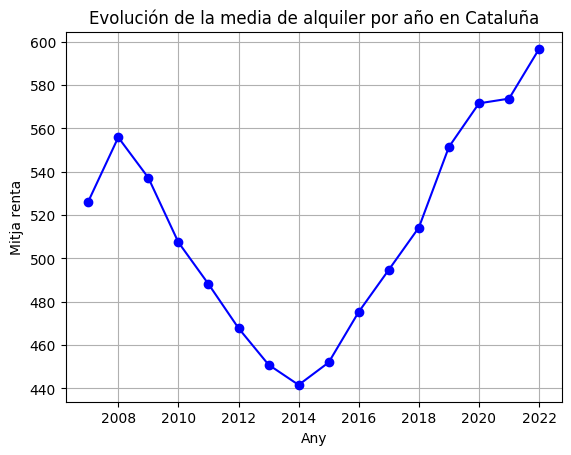

In [ ]:
media_renta = df_lloguer.groupBy('Any').agg(avg('Renda').alias('Mitja renta')).orderBy("ANY")
print(media_renta)
# Recopilar los resultados en la máquina maestra
resultados = media_renta.collect()

# Extraer los años y las medias de alquiler
años = [row['Any'] for row in resultados]
medias = [row['Mitja renta'] for row in resultados]

# Crear la gráfica
plt.plot(años, medias,  marker='o', linestyle='-', color='blue')
plt.xlabel('Any')
plt.ylabel('Mitja renta')
plt.title('Evolución de la media de alquiler por año en Cataluña')
plt.grid(True)
plt.show()

+----+---------+------------------+
| Any|provincia|       Mitja renta|
+----+---------+------------------+
|2022|   Lleida| 417.8052922299034|
|2022|Tarragona|475.75718731266437|
|2022|   Girona| 598.0434036625842|
|2022|Barcelona| 680.4705097803576|
|2021|Barcelona| 655.5013156608005|
|2021|Tarragona| 448.4873498204243|
|2021|   Lleida| 395.6375401896029|
|2021|   Girona|   574.11001520261|
|2020|Barcelona| 655.9554437019456|
|2020|   Girona| 560.7245551159507|
|2020|Tarragona|445.04714549969196|
|2020|   Lleida|392.74026378467926|
|2019|Barcelona|   638.17339591823|
|2019|   Lleida| 371.3144313401442|
|2019|   Girona| 538.6722383454372|
|2019|Tarragona| 434.7263400083419|
|2018|   Lleida|370.52683711957326|
|2018|Tarragona|412.42836839325577|
|2018|   Girona|  528.442199057721|
|2018|Barcelona| 593.2281221350845|
+----+---------+------------------+
only showing top 20 rows



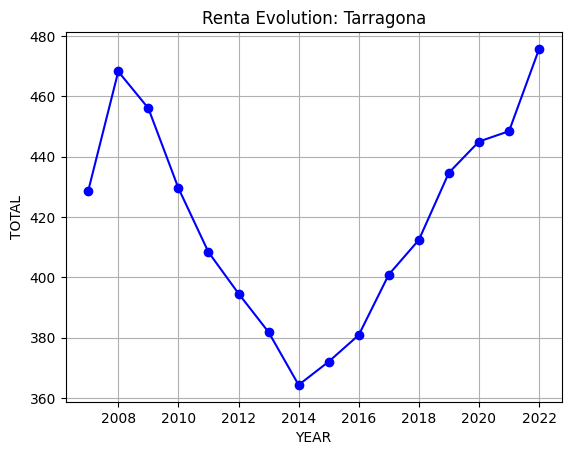

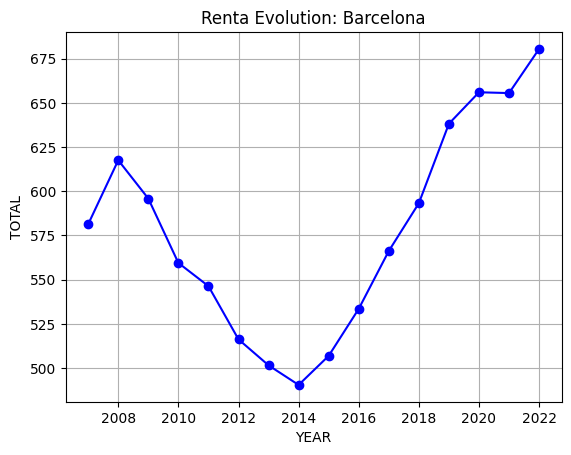

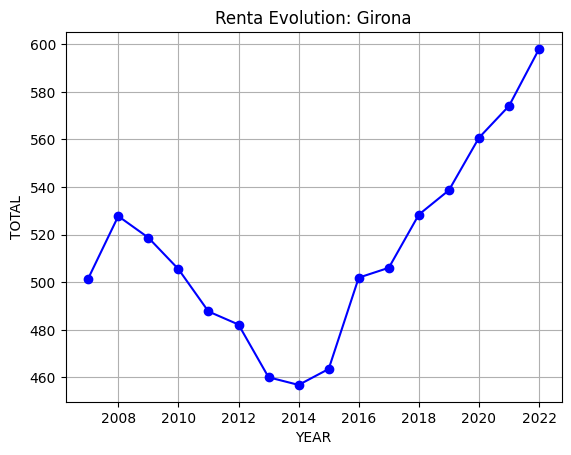

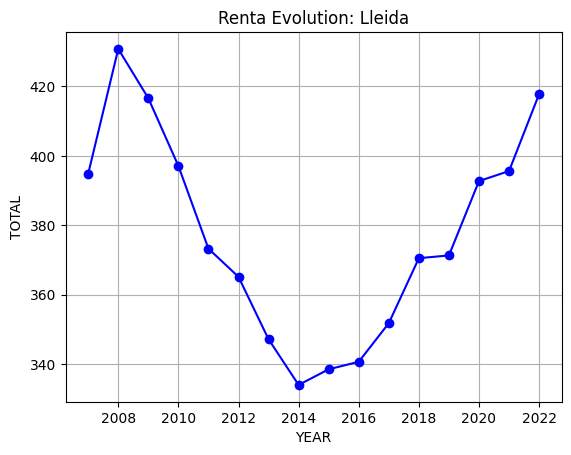

In [ ]:
prov_column = (
    when(col("Codi territorial").startswith("8"), "Barcelona")
    .when(col("Codi territorial").startswith("17"), "Girona")
    .when(col("Codi territorial").startswith("25"), "Lleida")
    .when(col("Codi territorial").startswith("43"), "Tarragona")
    .otherwise(None)
)

df_provincias_lloguer = df_lloguer.withColumn("provincia", prov_column)
df_provincias_lloguer = df_provincias_lloguer.groupBy('Any','provincia').agg(avg('Renda').alias('Mitja renta')).orderBy("ANY")

#sum_cols = { x : "sum" for x in df_provincias_lloguer.columns}
#df_provincias_lloguer = df_provincias.groupBy("Any","provincia").agg(sum_cols)
df_provincias_lloguer = df_provincias_lloguer.sort('Any')
df_provincias_lloguer = df_provincias_lloguer.orderBy(desc('Any'))
df_provincias_lloguer.show()

#Cojo las diferentes provincias para crearlas en diferentes graficas
provincias = df_provincias_lloguer.select("provincia").distinct().rdd.flatMap(lambda x: x).collect()
i=0
pl_list = []
for provincia in provincias:

    provincia_df = df_provincias_lloguer.filter(df_provincias_lloguer.provincia == provincia)
    datos_list = provincia_df.select("Any", "Mitja renta").orderBy("Any").collect()

    years = [row["Any"] for row in datos_list]
    medias = [row['Mitja renta'] for row in datos_list]

    plt.plot(years, medias, label=provincia,  marker='o', linestyle='-', color='blue')

    plt.xlabel('YEAR')
    plt.ylabel('TOTAL')
    plt.title('Renta Evolution: '+ provincia)
    plt.grid(True)
    plt.show()
    pl_list.append(plt)

for pl in pl_list:
    plt.show(pl)

# **Poblacio**

In [ ]:
spark_poblacio = (SparkSession
 .builder
 .appName("Poblacio")
 .getOrCreate())
spark_poblacio.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [ ]:
schema = StructType([
    StructField("_c0",IntegerType(),True),
    StructField("CODI_10",StringType(),True),
    StructField("NOM_ENS",StringType(),True),
    StructField("ANY", IntegerType(), True),
    StructField("TOTAL", IntegerType(), True),
    StructField("HOMES", FloatType(), True),
    StructField("DONES", FloatType(), True)
  ])

In [ ]:
df_poblacio = spark_poblacio.read.schema(schema).csv('/content/drive/MyDrive/csv/Dades_hist_riques_de_poblaci__dels_municipis_de_Catalunya_CLEANED.csv', header = True)
df_poblacio = df_poblacio.withColumnRenamed("_c0","PoblacioId")
df_poblacio = df_poblacio.filter(df_poblacio['ANY'] > 2006)
df_poblacio.printSchema()

root
 |-- PoblacioId: integer (nullable = true)
 |-- CODI_10: string (nullable = true)
 |-- NOM_ENS: string (nullable = true)
 |-- ANY: integer (nullable = true)
 |-- TOTAL: integer (nullable = true)
 |-- HOMES: float (nullable = true)
 |-- DONES: float (nullable = true)



In [ ]:
sum_cols = { x : "sum" for x in df_poblacio.columns}
df_poblacio_sum = df_poblacio.filter(col('NOM_ENS').startswith('Ajuntament')).groupBy("ANY").agg(sum_cols)
df_poblacio_sum = df_poblacio_sum.sort('ANY')
df_poblacio_sum = df_poblacio_sum.orderBy(desc('ANY'))
print(df_poblacio_sum)

+----+--------+----------+------------+----------+-----------------+----------+---------------+
| ANY|sum(ANY)|sum(DONES)|sum(NOM_ENS)|sum(HOMES)|     sum(CODI_10)|sum(TOTAL)|sum(PoblacioId)|
+----+--------+----------+------------+----------+-----------------+----------+---------------+
|2022| 1914834|      null|        null|      null|2.007372524269E12|   7792611|       30523704|
|2021| 1913887|      null|        null|      null|2.007372524269E12|   7763362|       15020751|
|2020| 1912940|      null|        null|      null|2.007372524269E12|   7780479|       15337677|
|2019| 1911993|      null|        null|      null|2.007372524269E12|   7675217|       14887934|
|2018| 1911046|      null|        null|      null|2.007372524269E12|   7600065|       14815128|
|2017| 1910099|      null|        null|      null|2.007372524269E12|   7555830|       15166217|
|2016| 1909152|      null|        null|      null|2.007372524269E12|   7522596|       14898658|
|2015| 1910220|      null|        null| 

Utilizamos el matplotlib para crear gráficas y así analizar los resultados

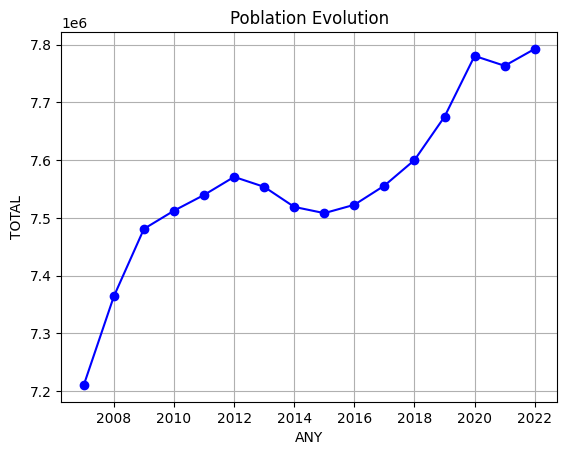

In [ ]:
poblacion_evo = df_poblacio_sum.select("ANY", "sum(TOTAL)").orderBy("ANY")

resultados = poblacion_evo.collect()

years = [row["ANY"] for row in resultados]
poblacion = [row["sum(TOTAL)"] for row in resultados]

plt.plot(years, poblacion,  marker='o', linestyle='-', color='blue')

plt.xlabel('ANY')
plt.ylabel('TOTAL')
plt.title('Poblation Evolution')
plt.grid(True)
plt.show()

Parece que provocó el efecto contrario al haber viviendas con bajos alquileres, tuvo un aumento masivo de habitantes en Cataluña, de 2009 a 2012 siguió aumentando de una manera más calmada, pero parece que a partir de 2012, al ver que no paraba de bajar, la población vio una posible crisis y decidieron marchar a otros paises a vivir.
https://www.huffingtonpost.es/2014/06/30/poblacion-espana-2014_n_5542882.html
https://www.elmundo.es/espana/2015/06/25/558bc830e2704e4b728b457a.html
https://www.hosteltur.com/161060_espana-pierde-poblacion-segundo-ano-consecutivo.html

Creo nueva columna segun como empiece el codigo territorial para analizar los datos dividiendolos por provincias de Cataluña

+----+---------+--------+----------+------------+----------+----------------+----------+--------------+---------------+
| ANY|provincia|sum(ANY)|sum(DONES)|sum(NOM_ENS)|sum(HOMES)|    sum(CODI_10)|sum(TOTAL)|sum(provincia)|sum(PoblacioId)|
+----+---------+--------+----------+------------+----------+----------------+----------+--------------+---------------+
|2022|   Lleida|  467082|      null|        null|      null|5.81424841054E11|    441443|          null|        7450996|
|2022|Tarragona|  372048|      null|        null|      null|7.93425510838E11|    830075|          null|        5909121|
|2022|   Girona|  446862|      null|        null|      null|3.78533840987E11|    793478|          null|        7127766|
|2022|Barcelona|  628842|      null|        null|      null| 2.5398833139E11|   5727615|          null|       10035821|
|2021|Barcelona|  628531|      null|        null|      null| 2.5398833139E11|   5714730|          null|        4833077|
|2021|Tarragona|  371864|      null|    

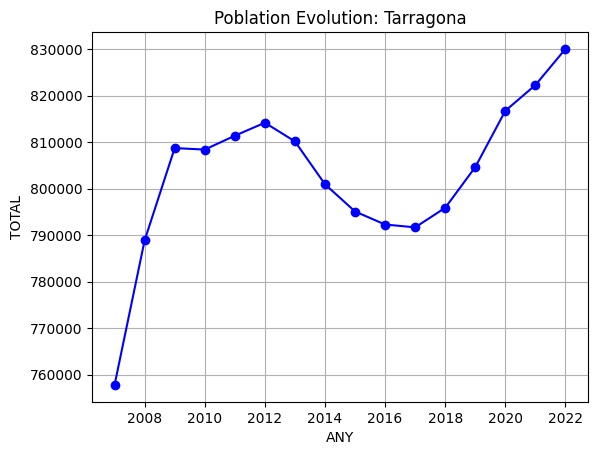

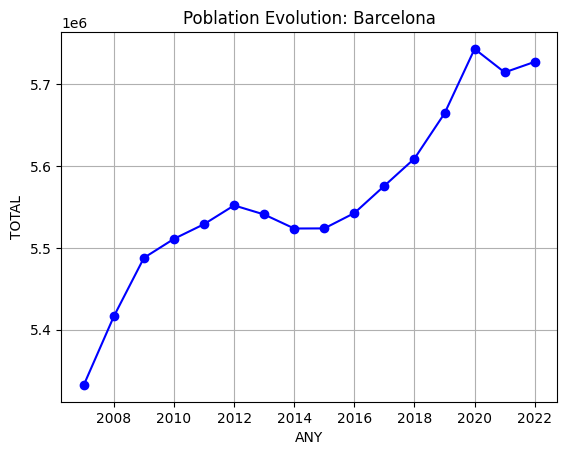

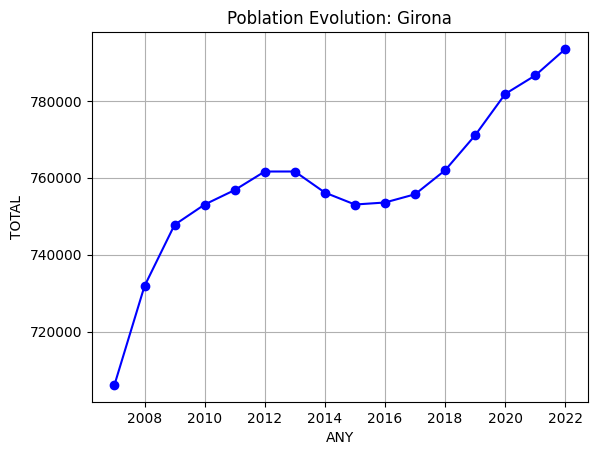

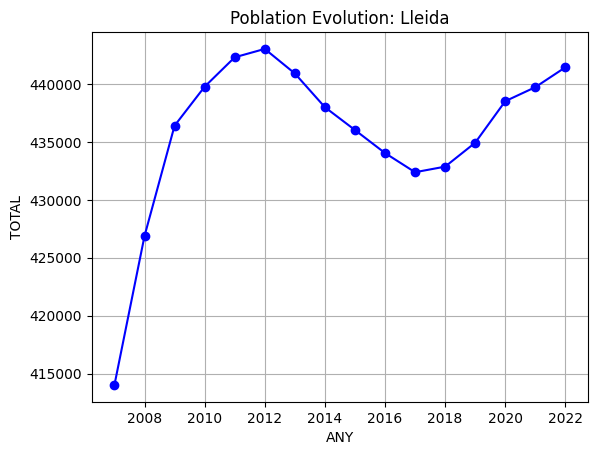

In [ ]:
prov_column = (
    when(col("CODI_10").startswith("8"), "Barcelona")
    .when(col("CODI_10").startswith("17"), "Girona")
    .when(col("CODI_10").startswith("25"), "Lleida")
    .when(col("CODI_10").startswith("43"), "Tarragona")
    .otherwise(None)
)

df_provincias_poblacio = df_poblacio.withColumn("provincia", prov_column)

sum_cols = { x : "sum" for x in df_provincias_poblacio.columns}
df_provincias_poblacio = df_provincias_poblacio.filter(col('NOM_ENS').startswith('Ajuntament')).groupBy("ANY","provincia").agg(sum_cols)
df_provincias_poblacio = df_provincias_poblacio.sort('ANY')
df_provincias_poblacio = df_provincias_poblacio.orderBy(desc('ANY'))
df_provincias_poblacio.show()

#Cojo las diferentes provincias para crearlas en diferentes graficas
provincias = df_provincias_poblacio.select("provincia").distinct().rdd.flatMap(lambda x: x).collect()
i=0
pl_list = []
for provincia in provincias:

    provincia_df = df_provincias_poblacio.filter(df_provincias_poblacio.provincia == provincia)
    datos_list = provincia_df.select("ANY", "sum(TOTAL)").orderBy("ANY").collect()

    years = [row["ANY"] for row in datos_list]
    poblacion = [row["sum(TOTAL)"] for row in datos_list]

    plt.plot(years, poblacion, label=provincia,  marker='o', linestyle='-', color='blue')

    plt.xlabel('ANY')
    plt.ylabel('TOTAL')
    plt.title('Poblation Evolution: '+ provincia)
    plt.grid(True)
    plt.show()
    pl_list.append(plt)

for pl in pl_list:
    plt.show(pl)


# **Comparación población, renta**

Join the two dataframes by "ANY","provincia" column, i renamed the column because there where creating two different columns on the join and that give some problems when creating the graphics.

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

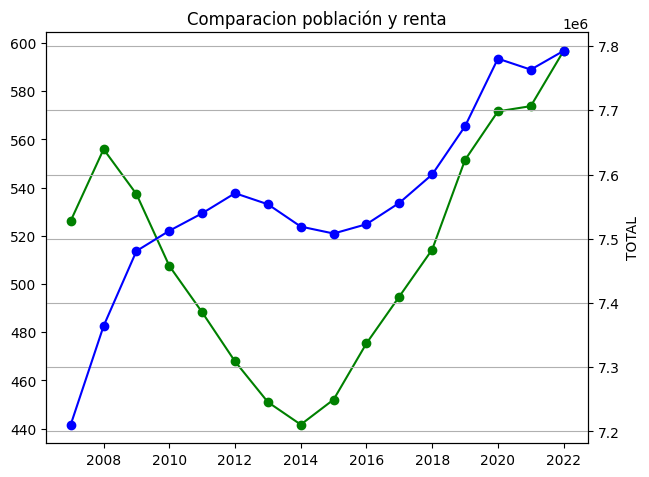

In [ ]:
media_renta = media_renta.withColumnRenamed("Any", "ANYLLOG")
df_join = poblacion_evo.join(media_renta,(poblacion_evo["ANY"] == media_renta["ANYLLOG"]))

datos_list = df_join.select("ANY", "sum(TOTAL)","Mitja renta").orderBy("ANY").collect()

years = [row["ANY"] for row in datos_list]
poblacion = [row["sum(TOTAL)"] for row in datos_list]
renta = [row["Mitja renta"] for row in datos_list]

#plot match scale lines
fig, ax1 = plt.subplots()

ax1.plot(years, renta, label=provincia,  marker='o', linestyle='-', color='green')
ax2 = ax1.twinx()
ax2.plot(years, poblacion, label=provincia,  marker='o', linestyle='-', color='blue')

fig.tight_layout()
#plt.show()
plt.xlabel('ANY')
plt.ylabel('TOTAL')
plt.title('Comparacion población y renta')
plt.grid(True)
#plt.show()
pl_list.append(plt)

Calculamos la correlación entre la media de la renta y la población total.
Si el resultado de la correlación es cercano a 1 tiene una correlación fuerte, si es cercano a 0, correlación débil o nula y -1, indica una correlación negativa fuerte.
En este caso, da una correlación positiva moderada, esto implica que a medida que la renta aumenta, es probable que también lo pueda hacer la población.

In [ ]:
df_corr = media_renta.join(poblacion_evo, (poblacion_evo["ANY"] == media_renta["ANYLLOG"]))

correlacion = df_corr.stat.corr("Mitja renta", "sum(TOTAL)")
print(correlacion)

0.39149494701705456


+----+---------+--------+----------+------------+----------+----------------+----------+--------------+---------------+-------+---------+------------------+
| ANY|provincia|sum(ANY)|sum(DONES)|sum(NOM_ENS)|sum(HOMES)|    sum(CODI_10)|sum(TOTAL)|sum(provincia)|sum(PoblacioId)|ANYLLOG|     prov|       Mitja renta|
+----+---------+--------+----------+------------+----------+----------------+----------+--------------+---------------+-------+---------+------------------+
|2014|   Lleida|  465234|      null|        null|      null|5.81424841054E11|    438001|          null|        3573149|   2014|   Lleida| 334.0031162949859|
|2008|   Girona|  443768|      null|        null|      null|3.78533840987E11|    731864|          null|        3561160|   2008|   Girona|  527.786562760671|
|2016|   Girona|  445536|      null|        null|      null|3.78533840987E11|    753576|          null|        3543203|   2016|   Girona| 501.9466924452244|
|2021|Tarragona|  371864|      null|        null|      nul

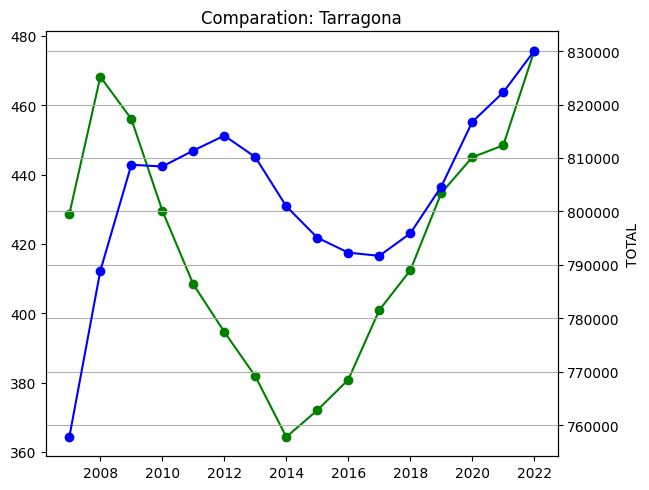

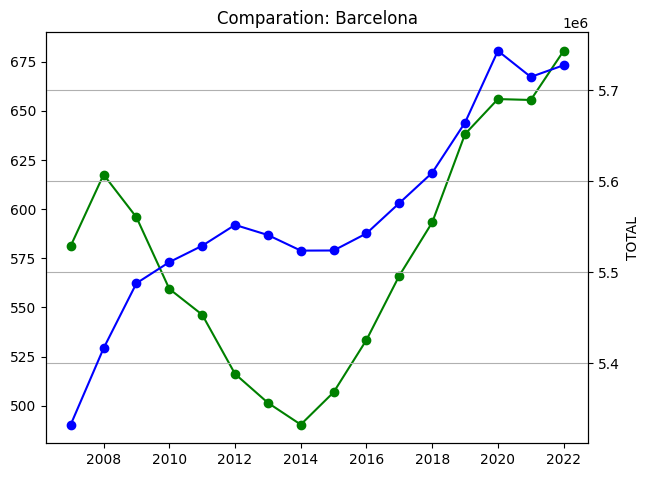

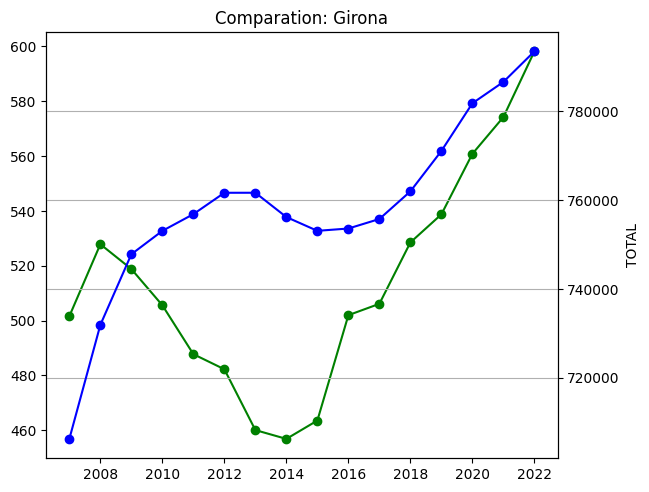

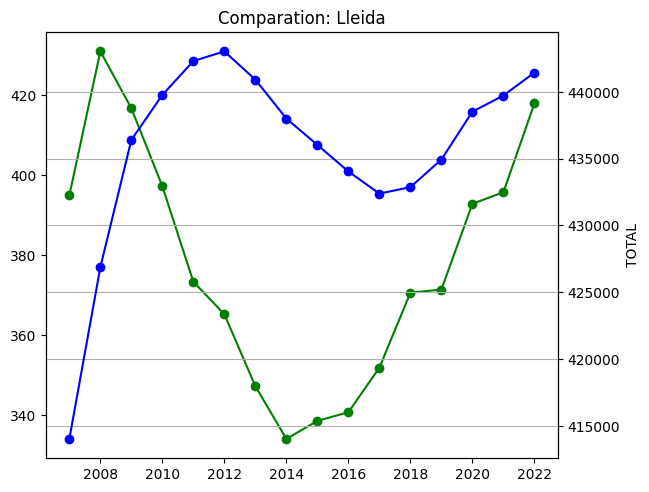

In [ ]:
df_provincias_lloguer = df_provincias_lloguer.withColumnRenamed("Any", "ANYLLOG")
df_provincias_lloguer = df_provincias_lloguer.withColumnRenamed("provincia", "prov")
df_join = df_provincias_poblacio.join(df_provincias_lloguer,(df_provincias_poblacio["provincia"] == df_provincias_lloguer["prov"]) & (df_provincias_poblacio["ANY"] == df_provincias_lloguer["ANYLLOG"]))
print(df_join)

for provincia in provincias:

    provincia_df = df_join.filter(df_join.provincia == provincia)
    datos_list = provincia_df.select("ANY", "sum(TOTAL)","Mitja renta").orderBy("ANY").collect()

    years = [row["ANY"] for row in datos_list]
    poblacion = [row["sum(TOTAL)"] for row in datos_list]
    renta = [row["Mitja renta"] for row in datos_list]

    #plot match scale lines
    fig, ax1 = plt.subplots()

    ax1.plot(years, renta, label=provincia,  marker='o', linestyle='-', color='green')
    ax2 = ax1.twinx()
    ax2.plot(years, poblacion, label=provincia,  marker='o', linestyle='-', color='blue')

    fig.tight_layout()
    #plt.show()
    plt.xlabel('ANY')
    plt.ylabel('TOTAL')
    plt.title('Comparation: '+ provincia)
    plt.grid(True)
    #plt.show()
    pl_list.append(plt)

for pl in pl_list:
    plt.show(pl)






Podemos ver que siguen una linea similar, pero para la población tarda algunos años en tener efecto, ya que no es instantaneo como por ejemplo que baje de precio algo, se nota más.

# **Compra Habitatges**

In [ ]:
spark_compra = (SparkSession
 .builder
 .appName("CompraHabitatges")
 .getOrCreate())
spark_compra.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [ ]:
schema = StructType([
    StructField("Comunidades y Ciudades Autñnomas",StringType(),True),
    StructField("Provincias",StringType(),True),
    StructField("Periodo", IntegerType(), True),
    StructField("Total", IntegerType(), True),
  ])

In [ ]:
df_compra = spark_compra.read.schema(schema).csv('/content/drive/MyDrive/csv/6150bsc_CLEANED.csv', header = True)
df_compra.printSchema()
print(df_compra)

root
 |-- Comunidades y Ciudades Autñnomas: string (nullable = true)
 |-- Provincias: string (nullable = true)
 |-- Periodo: integer (nullable = true)
 |-- Total: integer (nullable = true)

+--------------------------------+----------+-------+-----+
|Comunidades y Ciudades Autñnomas|Provincias|Periodo|Total|
+--------------------------------+----------+-------+-----+
|                      09 Catalua| Barcelona|   2023| 4491|
|                      09 Catalua| Barcelona|   2023| 5683|
|                      09 Catalua| Barcelona|   2023| 5030|
|                      09 Catalua| Barcelona|   2023| 5565|
|                      09 Catalua| Barcelona|   2022| 4315|
|                      09 Catalua| Barcelona|   2022| 5638|
|                      09 Catalua| Barcelona|   2022| 5266|
|                      09 Catalua| Barcelona|   2022| 5913|
|                      09 Catalua| Barcelona|   2022| 5607|
|                      09 Catalua| Barcelona|   2022| 5796|
|                      09 Cata

In [ ]:
sum_cols = { x : "sum" for x in df_compra.columns}
df_compra_sum = df_compra.groupBy("Periodo").agg(sum_cols)
df_compra_sum = df_compra_sum.sort('Periodo')
df_compra_sum = df_compra_sum.orderBy(desc('Periodo'))
df_compra_sum = df_compra_sum.filter(df_compra_sum['Periodo'] < 2023)
print(df_compra_sum)

+-------+-------------------------------------+----------+------------+---------------+
|Periodo|sum(Comunidades y Ciudades Autñnomas)|sum(Total)|sum(Periodo)|sum(Provincias)|
+-------+-------------------------------------+----------+------------+---------------+
|   2022|                                 null|    306474|      485280|           null|
|   2021|                                 null|    267525|      485040|           null|
|   2020|                                 null|    197658|      484800|           null|
|   2019|                                 null|    243018|      484560|           null|
|   2018|                                 null|    245055|      484320|           null|
|   2017|                                 null|    233730|      484080|           null|
|   2016|                                 null|    201642|      483840|           null|
|   2015|                                 null|    166119|      483600|           null|
|   2014|                       

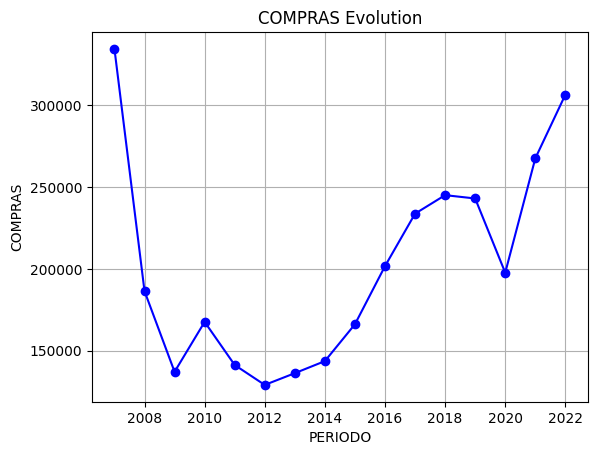

In [ ]:
compra_evo = df_compra_sum.select("Periodo", "sum(TOTAL)").orderBy("Periodo")

resultados = compra_evo.collect()

periodo = [row["Periodo"] for row in resultados]
compras = [row["sum(TOTAL)"] for row in resultados]

plt.plot(periodo, compras,  marker='o', linestyle='-', color='blue')

plt.xlabel('PERIODO')
plt.ylabel('COMPRAS')
plt.title('COMPRAS Evolution')
plt.grid(True)
plt.show()

+-------+----------+-------------------------------------+----------+------------+---------------+
|Periodo|Provincias|sum(Comunidades y Ciudades Autñnomas)|sum(Total)|sum(Periodo)|sum(Provincias)|
+-------+----------+-------------------------------------+----------+------------+---------------+
|   2022|    Lleida|                                 null|     14646|      121320|           null|
|   2022| Tarragona|                                 null|     47367|      121320|           null|
|   2022|    Girona|                                 null|     45570|      121320|           null|
|   2022| Barcelona|                                 null|    198891|      121320|           null|
|   2021| Tarragona|                                 null|     40770|      121260|           null|
|   2021| Barcelona|                                 null|    173982|      121260|           null|
|   2021|    Lleida|                                 null|     15177|      121260|           null|
|   2021| 

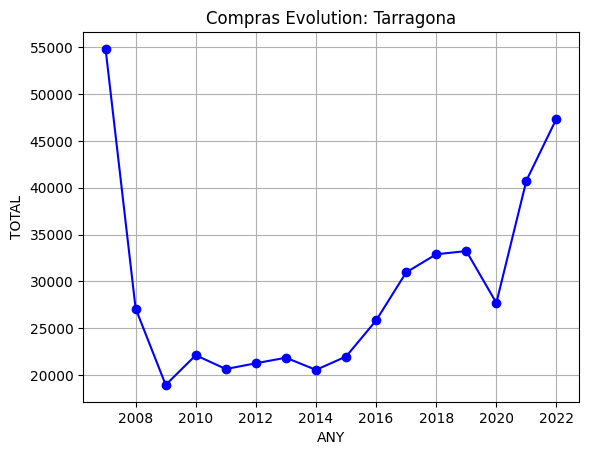

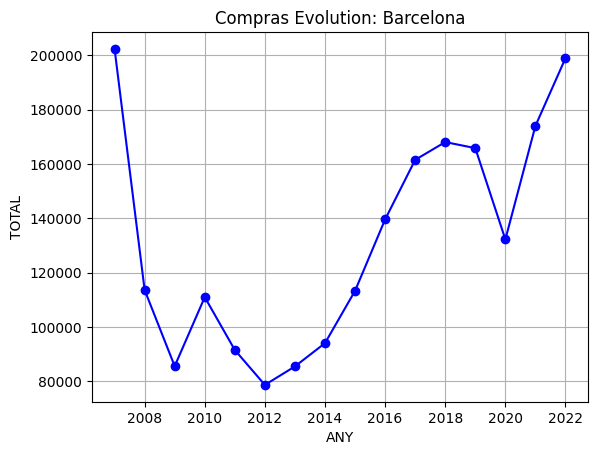

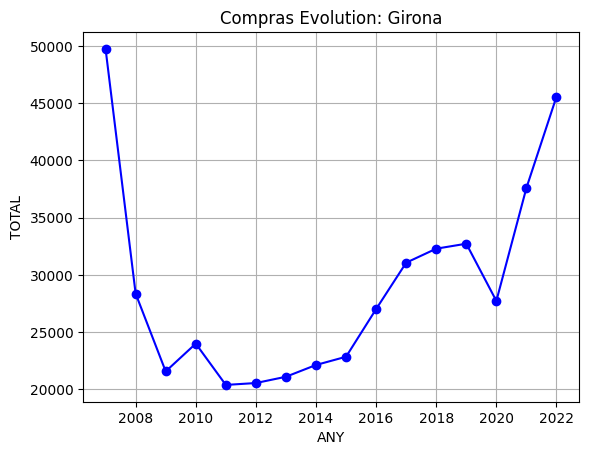

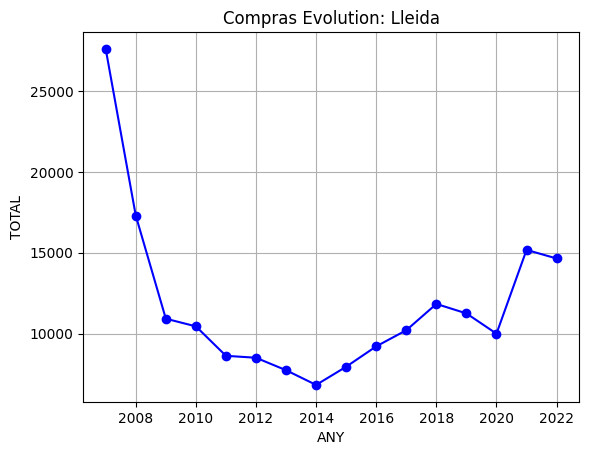

In [ ]:
df_provincias_compra = df_compra

sum_cols = { x : "sum" for x in df_provincias_compra.columns}
df_provincias_compra = df_provincias_compra.groupBy("Periodo","Provincias").agg(sum_cols)
df_provincias_compra = df_provincias_compra.sort('Periodo')
df_provincias_compra = df_provincias_compra.orderBy(desc('Periodo'))
df_provincias_compra = df_provincias_compra.filter(df_provincias_compra['Periodo'] < 2023)
df_provincias_compra.show()

#Cojo las diferentes provincias para crearlas en diferentes graficas
provincias = df_provincias_compra.select("Provincias").distinct().rdd.flatMap(lambda x: x).collect()
i=0
pl_list = []
for provincia in provincias:

    provincia_df = df_provincias_compra.filter(df_provincias_compra.Provincias == provincia)
    datos_list = provincia_df.select("Periodo", "sum(TOTAL)").orderBy("Periodo").collect()

    years = [row["Periodo"] for row in datos_list]
    poblacion = [row["sum(TOTAL)"] for row in datos_list]

    plt.plot(years, poblacion, label=provincia,  marker='o', linestyle='-', color='blue')

    plt.xlabel('ANY')
    plt.ylabel('TOTAL')
    plt.title('Compras Evolution: '+ provincia)
    plt.grid(True)
    plt.show()
    pl_list.append(plt)

for pl in pl_list:
    plt.show(pl)

# **Comparación compras, alquiler**

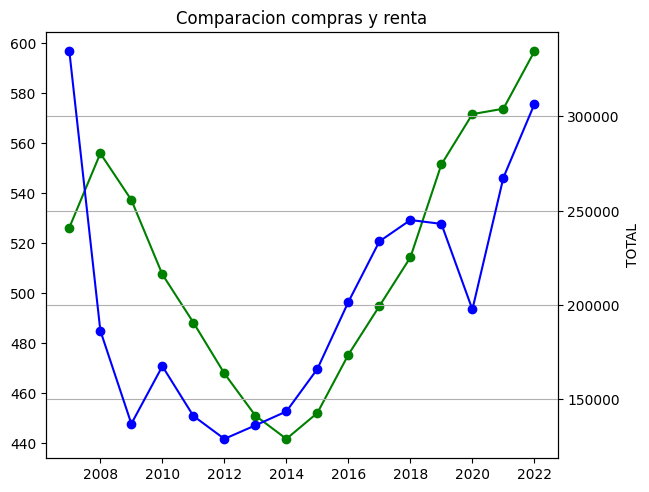

In [ ]:
media_renta = media_renta.withColumnRenamed("Any", "ANYLLOG")
df_join = compra_evo.join(media_renta,(compra_evo["Periodo"] == media_renta["ANYLLOG"]))

datos_list = df_join.select("Periodo", "sum(TOTAL)","Mitja renta").orderBy("Periodo").collect()

years = [row["Periodo"] for row in datos_list]
poblacion = [row["sum(TOTAL)"] for row in datos_list]
renta = [row["Mitja renta"] for row in datos_list]

#plot match scale lines
fig, ax1 = plt.subplots()

ax1.plot(years, renta, label=provincia,  marker='o', linestyle='-', color='green')
ax2 = ax1.twinx()
ax2.plot(years, poblacion, label=provincia,  marker='o', linestyle='-', color='blue')

fig.tight_layout()
#plt.show()
plt.xlabel('ANY')
plt.ylabel('TOTAL')
plt.title('Comparacion compras y renta')
plt.grid(True)
#plt.show()
pl_list.append(plt)

En este caso, al calcular la correlación, obtenemos un 0.6135556526649345,que indica una relación positiva moderada a fuerte entre las compras y ventas. Esto implica que existe una tendencia de aumento conjunto entre las variables analizadas.

In [ ]:
df_corr = media_renta.join(compra_evo, (compra_evo["Periodo"] == media_renta["ANYLLOG"]))

correlacion = df_corr.stat.corr("Mitja renta", "sum(TOTAL)")
print(correlacion)

0.6135556526649345


+-------+----------+-------------------------------------+----------+------------+---------------+-------+---------+------------------+
|Periodo|Provincias|sum(Comunidades y Ciudades Autñnomas)|sum(Total)|sum(Periodo)|sum(Provincias)|ANYLLOG|     prov|       Mitja renta|
+-------+----------+-------------------------------------+----------+------------+---------------+-------+---------+------------------+
|   2014|    Lleida|                                 null|      6828|      120840|           null|   2014|   Lleida| 334.0031162949859|
|   2008|    Girona|                                 null|     28356|      120480|           null|   2008|   Girona|  527.786562760671|
|   2016|    Girona|                                 null|     27003|      120960|           null|   2016|   Girona| 501.9466924452244|
|   2021| Tarragona|                                 null|     40770|      121260|           null|   2021|Tarragona| 448.4873498204243|
|   2007| Barcelona|                            

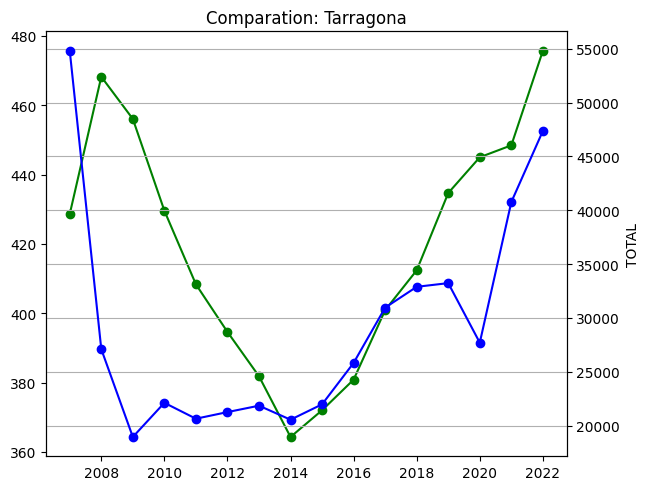

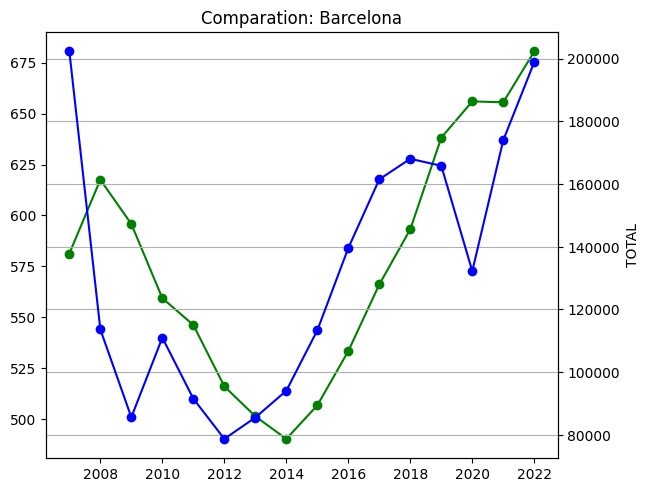

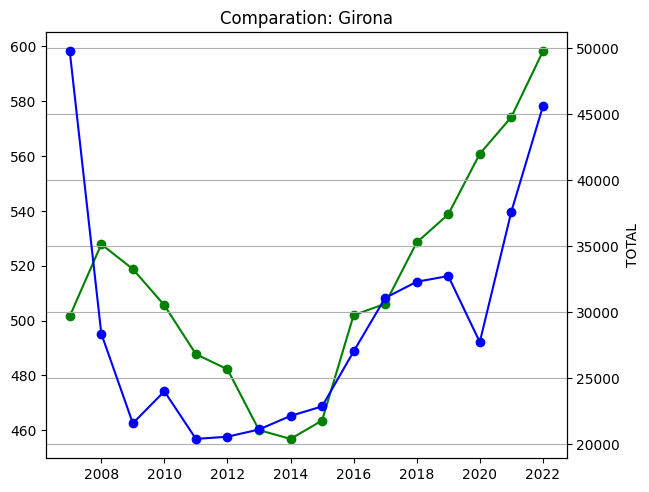

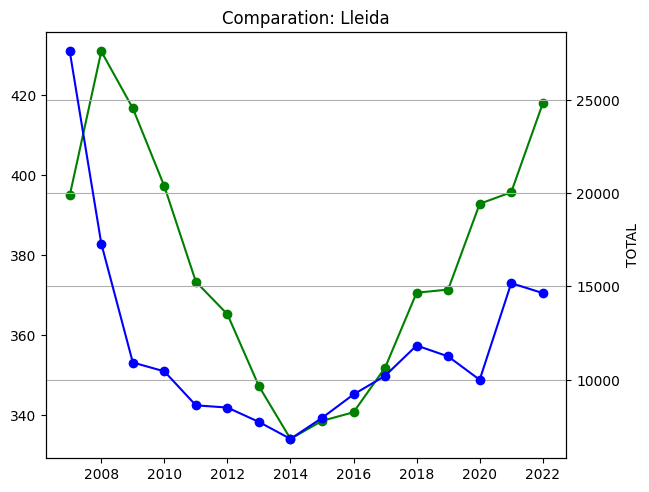

In [ ]:
df_provincias_lloguer = df_provincias_lloguer.withColumnRenamed("Any", "ANYLLOG")
df_provincias_lloguer = df_provincias_lloguer.withColumnRenamed("provincia", "prov")
df_join = df_provincias_compra.join(df_provincias_lloguer,(df_provincias_compra["provincias"] == df_provincias_lloguer["prov"]) & (df_provincias_compra["Periodo"] == df_provincias_lloguer["ANYLLOG"]))
print(df_join)

for provincia in provincias:

    provincia_df = df_join.filter(df_join.Provincias == provincia)
    datos_list = provincia_df.select("Periodo", "sum(TOTAL)","Mitja renta").orderBy("Periodo").collect()

    years = [row["Periodo"] for row in datos_list]
    poblacion = [row["sum(TOTAL)"] for row in datos_list]
    renta = [row["Mitja renta"] for row in datos_list]

    #plot match scale lines
    fig, ax1 = plt.subplots()

    ax1.plot(years, renta, label=provincia,  marker='o', linestyle='-', color='green')
    ax2 = ax1.twinx()
    ax2.plot(years, poblacion, label=provincia,  marker='o', linestyle='-', color='blue')

    fig.tight_layout()
    #plt.show()
    plt.xlabel('ANY')
    plt.ylabel('TOTAL')
    plt.title('Comparation: '+ provincia)
    plt.grid(True)
    #plt.show()
    pl_list.append(plt)

for pl in pl_list:
    plt.show(pl)
